In [1]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

# 인공신경망 만들기   
pytorch로 인공신경망을 만들어봅시다..!!
---

In [2]:
#인공지능을 학습하고 시험할 데이터셋을 만듭니다!!
n_dim = 2
x_train, y_train = make_blobs(n_samples=80,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                             shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20,n_features=n_dim,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],
                           shuffle=True, cluster_std=0.3)

In [3]:
#[1,1]과 [-1,-1]은 0으로 [1,-1]과 [-1,1]은 1로 라벨링을 합니다.
def label_map(y_,from_,to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_==f]=to_
    return y

y_train = label_map(y_train, [0,1],0)
y_train = label_map(y_train,[2,3],1)
y_test = label_map(y_test,[0,1],0)
y_test = label_map(y_test,[2,3],1)

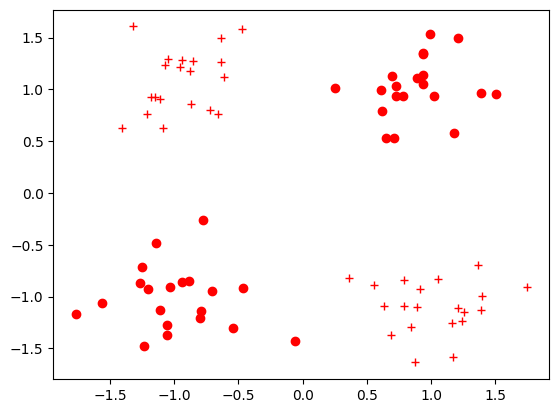

In [4]:
#시각화를 해봅시다!!
def vis_data(x,y=None,c='r'):
    if y is None:
        y = [None]*len(x)
    for x_,y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0],x_[1],'*',markerfacecolor='none',
                    markeredgecolor=c)
        else:
            plt.plot(x_[0],x_[1],c+'o'if y_==0 else c+'+')
            
plt.figure()
vis_data(x_train,y_train,c='r')
plt.show()

In [5]:
#학습을 돌리기 위해 넘파이 형태를 텐서 형태로 변환해줍니다.
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [6]:
#학습 모델을 만듭니다!!
class NeuralNet(torch.nn.Module): #인공지능 class 만들기
    def __init__(self,input_size,hidden_size): #입력층과 은닉층을 받아 초기화합니다.
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size) #input_size의 노드에서 hidden_size차원의 노드로...!!
        self.relu = torch.nn.ReLU() #엑티베이션 = 렐루
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1) #hidden_size에서 1차원 노드로...!!
        self.sigmoid = torch.nn.Sigmoid() #엑티베이션 = 시그모이드
        
    def forward(self, input_tensor): #레이어 이어주기
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [7]:
model = NeuralNet(2, 5) 
#하이퍼 파라미터 설정
learning_rate = 0.03

#2진분류이므로 바이너리 크로스 엔트로피!!
criterion = torch.nn.BCELoss()

In [8]:
epochs = 2000 #학습은 2000번!

In [9]:
#확률적 경사하강법으로 loss줄이기
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [10]:
#모델 학습시키기전 성능체크
model.eval() #모델 키고
test_loss_before = criterion(model(x_test).squeeze(),y_test) #모델에 x_test넣고 squeeze()로 차원 맞춰서 y_test와 오차 계산하기
print('Before Training, test loss is {}'.format(test_loss_before.item())) #출력..!!

Before Training, test loss is 0.6701405644416809


In [11]:
#모델 학습시키기
for epoch in range(epochs): #에포크만큼 반복
    model.train() # 학습모드로 전환
    optimizer.zero_grad() #반복할 때마다 새로운 경사값을 계산하므로 zero_grad()
    train_output = model(x_train) #x_train을 넣고 결과 확인
    train_loss = criterion(train_output.squeeze(),y_train) #사이즈 맞춰서 오차보기
    if epoch % 100 == 0: # 100마다 출력!!
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward() #오차 미분해서
    optimizer.step() #러닝레이트만큼 이동하기 - 역전파! (이거 안하면 학습이 안됨)

Train loss at 0 is 0.6605849862098694
Train loss at 100 is 0.5664416551589966
Train loss at 200 is 0.4544237554073334
Train loss at 300 is 0.35328030586242676
Train loss at 400 is 0.27712133526802063
Train loss at 500 is 0.2236335724592209
Train loss at 600 is 0.18622590601444244
Train loss at 700 is 0.16048698127269745
Train loss at 800 is 0.1408158242702484
Train loss at 900 is 0.12523594498634338
Train loss at 1000 is 0.11264507472515106
Train loss at 1100 is 0.10224200785160065
Train loss at 1200 is 0.09345990419387817
Train loss at 1300 is 0.08592589199542999
Train loss at 1400 is 0.0795283168554306
Train loss at 1500 is 0.07405266910791397
Train loss at 1600 is 0.06927879899740219
Train loss at 1700 is 0.06504632532596588
Train loss at 1800 is 0.06126440316438675
Train loss at 1900 is 0.05787670612335205


In [12]:
model.eval() #모델 키고
test_loss_before = criterion(torch.squeeze(model(x_test)),y_test) #test사이즈 맞춰서 오차 구하기
print('After Training, test loss is {}'.format(test_loss_before.item())) #오차는...?!

After Training, test loss is 0.056919775903224945


In [13]:
torch.save(model.state_dict(),'./model_jess1.pt') #모델 저장하기!!!
print('state_dict format of the model: {}'.format(model.state_dict())) #저장한 모델의 정보

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.8482, -1.0388],
        [ 1.7410,  1.0206],
        [-1.2899, -1.8330],
        [ 1.4740, -1.2973],
        [ 1.2564,  0.7174]])), ('linear_1.bias', tensor([-0.2695, -0.2435, -0.2506, -0.2682, -0.1507])), ('linear_2.weight', tensor([[-1.1363, -1.9009, -2.0857,  1.7513, -1.4353]])), ('linear_2.bias', tensor([2.2687]))])


In [14]:
new_model = NeuralNet(2,5) #모델 만들고
new_model.load_state_dict(torch.load('./model_jess1.pt')) #방금 만든 모델 불러오기

<All keys matched successfully>

In [15]:
new_model.eval() #모델 켜주고
print('벡터 [-1,1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item())) #TEST!!

벡터 [-1,1]이 레이블 1을 가질 확률은 0.9062548279762268


In [16]:
old_model = NeuralNet(2,5) #모델 만들고
old_model.load_state_dict(torch.load('./model.pt')) #이건 이 책의 저자의 git에 있던 모델,,

<All keys matched successfully>

In [17]:
old_model.eval() #모델 키고
print('기존 모델의 확률은...?: {}'.format(old_model(torch.FloatTensor([-1,1])).item())) #성능 확인!!

기존 모델의 확률은...?: 0.9861199855804443
